# 任务2：论文作者统计

## 任务说明

本次任务的主题是：对论文作者进行统计，统计所有论文作者出现频率Top 10的姓名。

## 具体代码实现

### 数据读取

In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

C:\Users\LWKM\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('./arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors', 'categories', 'authors_parsed'],
                    100000)


In [3]:
data.head()

,id,authors,categories,authors_parsed
0,0704.0001,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",hep-ph,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Ileana Streinu and Louis Theran,math.CO cs.CG,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,physics.gen-ph,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,math.CO,"[[Callan, David, ]]"
4,0704.0005,Wael Abu-Shammala and Alberto Torchinsky,math.CA math.FA,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


### 数据统计

选择cs.CV类别下的论文进行分析。注意`apply`的使用：

In [4]:
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

In [5]:
data2.head()

,id,authors,categories,authors_parsed
1266,0704.1267,"Laurence Likforman-Sulem, Abderrazak Zahour, B...",cs.CV,"[[Likforman-Sulem, Laurence, ], [Zahour, Abder..."
3634,0704.3635,Fulufhelo Vincent Nelwamondo and Tshilidzi Mar...,cs.CV cs.IR,"[[Nelwamondo, Fulufhelo Vincent, ], [Marwala, ..."
4201,0705.0199,"Erik Berglund, Joaquin Sitte",cs.NE cs.AI cs.CV,"[[Berglund, Erik, ], [Sitte, Joaquin, ]]"
4216,0705.0214,"Mourad Zerai, Maher Moakher",cs.CV,"[[Zerai, Mourad, ], [Moakher, Maher, ]]"
4451,0705.0449,"Pierre-Fran\c{c}ois Marteau (VALORIA), Gilbas ...",cs.CV,"[[Marteau, Pierre-François, , VALORIA], [Ménie..."


In [6]:
# 将作者名单拼接为一个list
all_authors = sum(data2['authors_parsed'],[])

`sum(list,[])`能将**一组**列表拼接为**一个**列表：

In [7]:
sum([['a'],['b','c'],['d',2]],[])

['a', 'b', 'c', 'd', 2]

类似的操作也能完成元组的拼接：

In [8]:
sum([(1,2),(3,4)],())

(1, 2, 3, 4)

In [9]:
# 将作者列表拼接为一个字符串，并将字符串列表转为数据框
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

Text(0.5, 0, 'Count')

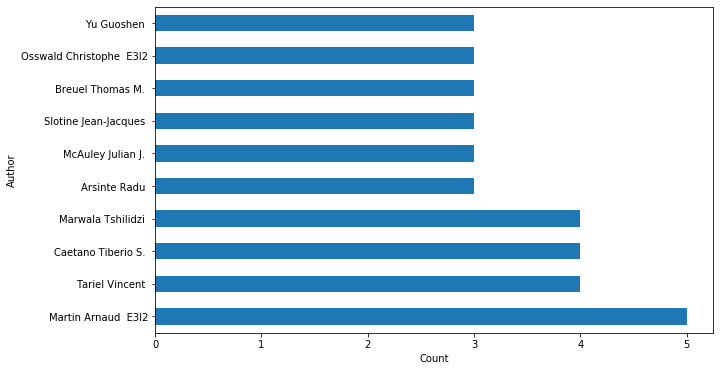

In [10]:
# 根据作者频率绘制直方图
plt.figure(figsize=(10,6))
authors_names[0].value_counts().head(10).plot(kind='barh')
# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

接下来，统计姓氏中的top10：

Text(0.5, 0, 'Count')

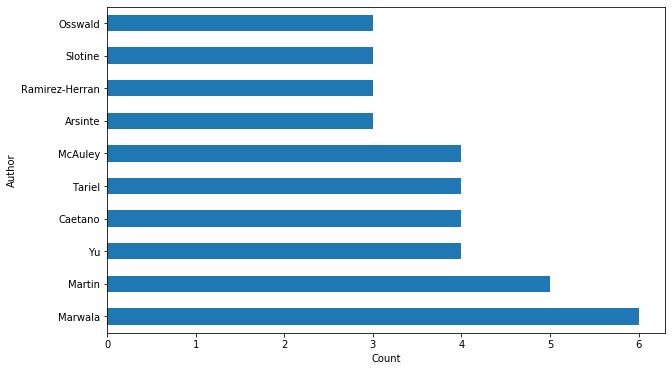

In [11]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')